## **Ламинарни гранични слој на равној плочи - Блазијусово решење**

У случају танке равне плоче спољашње, потенцијално струјање је $U = U_{\infty} = \mathrm{const}$, те је поље притиска хомогено, тј $\mathrm{d}p/\mathrm{d}x = 0$, па се Прантлове једначине граничног слоја своде на

\begin{eqnarray}
& &\frac{\partial u}{\partial x} +  \frac{\partial v}{\partial y} = 0
\label{eq:1}\tag{1} \\
& & u \, \frac{\partial u}{\partial x} +  \, v \frac{\partial u}{\partial y} = \nu\,\frac{\partial^2 u}{\partial y^2}
\label{eq:2}\tag{2}
\end{eqnarray}

Дакле, имамо две парцијалне диференцијалне једначине из којих се одређују две непознате величине - пројекције брзине у аксијалном и попречном правцу, $u=u(x,y)$ и $v=v(x,y)$. Гранични услови који се придружују овим једначинама су

\begin{equation}
y = 0\!: \quad u=0, \,\, v=0 \qquad \qquad y \to \infty\!: \quad  u = U_{\infty}
\label{eq:3}\tag{3}
\end{equation}

Парцијална диференцијална једначина \eqref{eq:2} је пaраболичког типа. Овај тип једначина, уз одговарајуће граничне услове може поседовати особину сличности решења, односно погодном трансформацијом се може свести на обичну диференцијалну једначину. У ту сврху се прво уводи струјна функција $\psi = \psi(x,y)$

$$ u = \frac{\partial \psi}{\partial y}, \qquad v = -\frac{\partial \psi}{\partial x}$$

На овај начин једначина континуитета \eqref{eq:1} је идентички задовољена. Увођењем бездимензијске координате (промењиве сличности) $\eta = \eta(x,y)$, и бездимензијске функције $f(\eta)$ на следећи начин:

$$\eta = y\, \sqrt{\frac{U_{\infty}}{2 \nu x}}, \qquad \psi(x,y) = \sqrt{2 U_{\infty} \nu x}\, f(\eta)$$

следе изрази за пројекције брзине $u$ и $v$ 

$$u = \frac{\partial \psi}{\partial y} = \frac{\partial \eta}{\partial y}  \frac{\partial \psi}{\partial \eta} = U_{\infty} f^{\prime} \qquad \text{и} \qquad v = -\frac{\partial \psi}{\partial x} = - \sqrt{2 U_{\infty}\nu}\, f \,\frac{\partial}{\partial x}\left(\sqrt{x}\right) + \frac{\partial \eta}{\partial x}  \frac{\partial \psi}{\partial \eta} = \sqrt{\frac{\nu U_{\infty}}{2x}}\, (\eta f^{\prime} - f)$$

Заменом ових израза у једначину $\eqref{eq:2}$ добија се **обична диференцијална једначина**

\begin{equation}
\boxed{\,\,f^{\prime\prime\prime} + f f^{\prime\prime} =0 \qquad \Leftrightarrow \qquad \frac{\mathrm{d}^3 f}{\mathrm{d}\eta^3} + f \frac{d^2 f}{\mathrm{d}\eta^2} = 0\,\,}
\label{eq:4}\tag{4}
\end{equation}

На основу физичких граничних услова \eqref{eq:3}, и дефиниције промењиве $\eta$ и израза за пројекције брзине, следе гранични услови који се придружују једначини \eqref{eq:4}

$$ \eta = 0\!: \quad f = 0, \,\,f^{\prime} = 0 \qquad \quad \eta \to {\infty}\!: f^{\prime} = 1$$

Једначина \eqref{eq:4} се трансформише у систем од три обичне диференцијалне једначине првог реда, увођењем функција $f_1(\eta)$, $f_2(\eta)$ и $f_3(\eta)$

$$\begin{array}{llll}
  f_1 = f & \rightarrow & f_1^{\prime} = f^{\prime}  & \rightarrow & f_1^{\prime} = f_2   \\
  f_2 = f^{\prime} & \rightarrow & f_2^{\prime} = f^{\prime\prime} & \rightarrow & f_2^{\prime} = f_3 \\
  f_3 = f^{\prime\prime} & \rightarrow & f_3^{\prime} = f^{\prime\prime\prime} & \rightarrow & f_3^{\prime} = -f_1 f_3\\
\end{array}$$

и придруженим "почетним" и граничним условима: $f_1(0) = 0, f_2(0) = 0$ и $f_1(\infty) = 1$. Дакле, у питању је "boundary value problem (BVP)" који се решава методом гађања (shooting method). Свакако, у нумеричком поступку је немогуће узети границу бесконачно, већ ће се за горњу границу изабрати $\eta = 10$, тако је гранични услов на горњој граници $f_1(10) = 1$.

1
1.0
1.0
1.0000000149011612
0.4062401335891338
0.47942044951448104
0.46982838413788636
0.4695992027915145
0.4695999942024915
0.4695999941383557


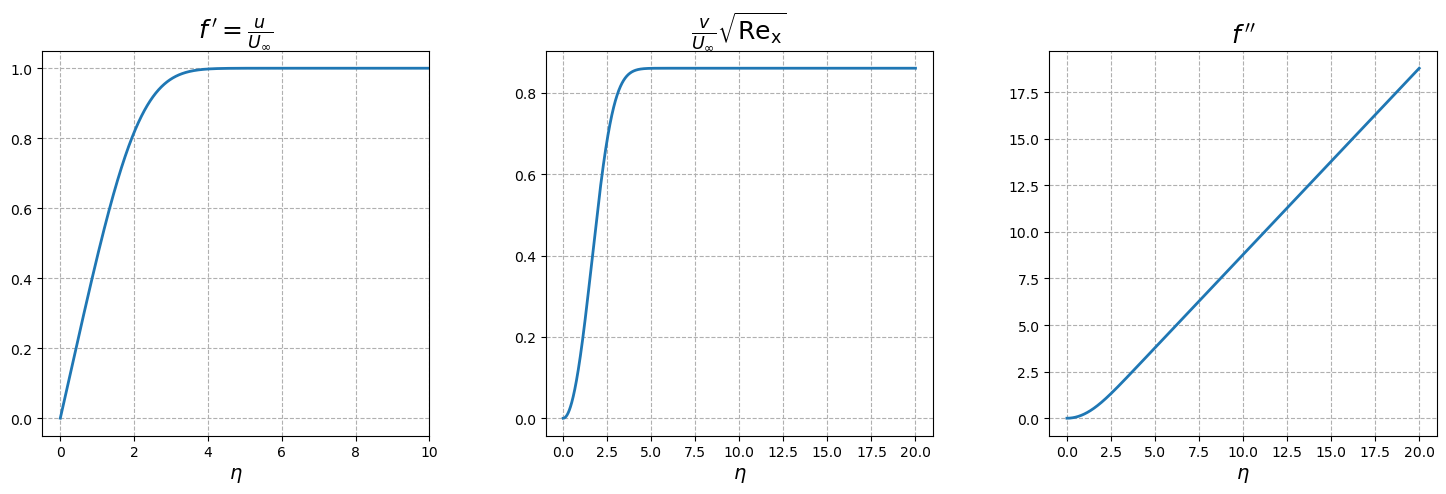

In [27]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
from scipy.special import erf
import matplotlib.pyplot as plt


# Desna strana sistema diferencijalnih jednacina
def odefun(f,t):
    f1, f2, f3 = f
    df1 = f2
    df2 = f3
    df3 = -f1*f3
    return [df1, df2, df3]

## Poznati pocetni uslovi
f1_0 = 0   
f2_0 = 0
eta = np.linspace(0, 20, 5000)

## SHOOTING - resavanje nelinearne algebarske jednacine 
def objective(f3_0):
    f3_0 = f3_0[0]
    f = odeint(odefun, [f1_0, f2_0, f3_0], eta)
    f2 = f[:, 1]
    print (f3_0)
    return f2[-1] - 1

f3_0 = fsolve(objective, 1)[0]
## ------------- END of shooting ------------------------

f = odeint(odefun, [f1_0, f2_0, f3_0], eta)
plt.figure(figsize=(18, 5))
plt.subplots_adjust(wspace=0.3)
v = np.sqrt(1/2)*(eta*f[:,1] - f[:,0])

fig1=plt.subplot(131)
#fig1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
plt.xlim([-0.5, 10])
plt.title("$f^{\,\prime} = \\frac{u}{U_{\infty}}$", fontsize=18)
plt.grid(True, linestyle='dashed')
plt.xlabel('$\eta$', fontsize=14)
plt.plot(eta, f[:,1], lw =2)
#plt.plot(eta, erf(eta))

fig2=plt.subplot(132)
#fig2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
plt.title('$\\frac{v}{U_{\infty}} \sqrt{\mathrm{Re_x}}$', fontsize=18)
plt.grid(True, linestyle='dashed')
plt.xlabel('$\eta$', fontsize=14)
plt.plot(eta, v, lw = 2)

fig3=plt.subplot(133)
#fig3.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
plt.title('$f^{\,\prime\prime}$', fontsize=18)
plt.grid(True, linestyle='dashed')
plt.xlabel('$\eta$', fontsize=14)
plt.plot(eta, f[:,0], lw = 2)


In [25]:
np.column_stack((eta, f[:,1], f[:, 2]))

array([[ 0.00000000e+00,  0.00000000e+00,  4.69599994e-01],
       [ 4.00080016e-03,  1.87877572e-03,  4.69599990e-01],
       [ 8.00160032e-03,  3.75755140e-03,  4.69599972e-01],
       ...,
       [ 1.99919984e+01,  1.00000000e+00, -5.70119316e-11],
       [ 1.99959992e+01,  1.00000000e+00, -5.70071353e-11],
       [ 2.00000000e+01,  1.00000000e+00, -5.70023390e-11]])

Прикааз функције $\Phi [f_3(0)]$

Text(0, 0.5, '$\\Phi\\,[f_3(0)]$')

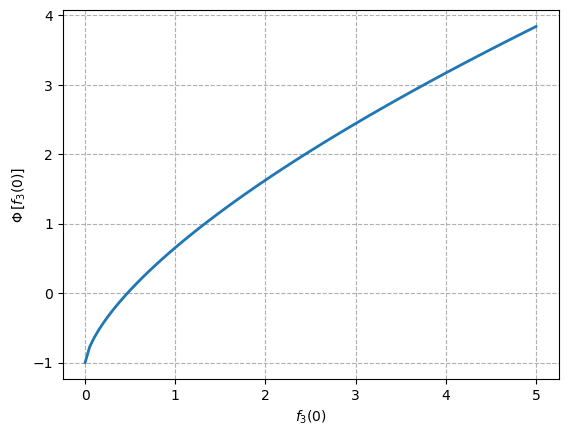

In [26]:
# Desna strana sistema diferencijalnih jednacina
def odefun(f,t):
    f1, f2, f3 = f
    df1 = f2
    df2 = f3
    df3 = -f1*f3
    return [df1, df2, df3]

f3_guess = np.linspace(0, 5, 100)
phi = []
for f3_0 in f3_guess:
    f = odeint(odefun, [f1_0, f2_0, f3_0], eta)
    phi.append(f[:, 1][-1] - 1)

plt.plot(f3_guess, phi, lw=2)
plt.grid(True, linestyle='dashed')  
plt.xlabel("$f_3(0)$")
plt.ylabel("$\Phi\,[f_3(0)]$")